In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib notebook


# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

In [2]:
#https://data.worldbank.org/indicator/VC.IHR.PSRC.FE.P5

cols=['Country Name','Country Code','2000','2001','2002','2003','2004','2005','2006','2007',
          '2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
data_Female = pd.read_csv("Female.csv",skiprows=[0,1,2,3],delimiter=',',usecols=cols)
data_Female.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,NaN,4.145164,2.019957,1.972153,0.000000,1.906432,1.890574,0.000000,1.882991,1.882885,0.00000,0.000000,1.862059,1.849694,0.000000,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.616658,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.052994,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,0.841784,2.528448,2.528125,1.360916,1.232834,1.367925,1.508825,1.589771,1.272548,0.473767,1.29682,1.525413,1.791817,1.659265,0.898196,0.967193,1.034955,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.431462,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [3]:
#https://data.worldbank.org/indicator/VC.IHR.PSRC.MA.P5
data_Male = pd.read_csv("male.csv",skiprows=[0,1,2,3],delimiter=',',usecols=cols)
data_Male.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,NaN,4.479986,8.793915,6.478082,4.252786,10.509942,8.344633,6.231953,8.289984,6.206169,8.253379,4.110997,6.137731,10.177081,4.050305,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.758772,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.764833,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,7.479593,11.456030,11.228186,9.247844,7.195234,8.613945,4.705984,5.349140,4.938028,5.252111,7.320074,8.147514,8.917704,6.797467,7.058360,3.523353,4.330897,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2.343159,0.000000,0.000000,0.000000,0.000000,NaN,NaN


## Clean The Data Set

### 1) Female Data

In [4]:
data_Female.set_index(['Country Code'],inplace=True)
data_Female = data_Female.loc[['DEU','USA']]
data_Female.drop(['2017','Country Name'], axis=1,inplace=True)
data_Female = data_Female.T
# convert the data from object to float 
data_Female['USA'] = data_Female.USA.astype(float)
data_Female['DEU'] = data_Female.DEU.astype(float)
#data_Female['Sex']= np.ones(len(data_Female.index),dtype=np.int)

In [5]:
data_Female.head()

Country Code,DEU,USA
2000,1.131365,2.592233
2001,0.940550,3.086360
2002,1.053296,2.579601
2003,0.912015,2.513363
2004,0.951887,2.396251


### 2) Male data

In [6]:
data_Male.set_index(['Country Code'],inplace=True)
data_Male = data_Male.loc[['DEU','USA']]
data_Male.drop(['2017','Country Name'], axis=1,inplace=True)

data_Male = data_Male.T
# convert the data from object to float 
data_Male['USA'] = data_Male.USA.astype(float)
data_Male['DEU'] = data_Male.DEU.astype(float)
#data_Male['Sex']= np.zeros(len(data_Female.index),dtype=np.int)

In [7]:
data_Male.head()

Country Code,DEU,USA
2000,1.365929,8.551437
2001,1.338481,10.382945
2002,1.292960,8.797537
2003,1.198009,8.972788
2004,1.177828,8.728375


### Combine the all the data into one data frame

In [8]:
'''male = data_Male.copy()
male.index.names = ['Year']
male.columns.names = ['Columns']
male = male.reset_index()
female = data_Female.copy()
female.index.names = ['Year']
female.columns.names = ['Columns']
female = female.reset_index()
results = pd.concat([male, female], axis=0, join='inner')'''

In [9]:
Female_Homicide_USA = data_Female.USA
Female_Homicide_DEU = data_Female.DEU

In [10]:
df = data_Male.copy()
df = df.rename(index=str, columns={"DEU": "DEU_Male", "USA": "USA_Male"})

In [11]:
df['DEU_Female'] = Female_Homicide_DEU
df['USA_Female'] = Female_Homicide_USA

In [12]:
dropcols= ['2000','2001','2002','2003','2004','2005','2006','2007',
          '2008','2009','2010','2011']
df.drop(dropcols, axis=0,inplace=True)

In [13]:
df.head()

Country Code,DEU_Male,USA_Male,DEU_Female,USA_Female
2012,0.912204,7.461728,0.717185,2.082932
2013,0.886817,7.147319,0.793284,1.986581
2014,0.941219,6.988042,0.818144,1.982578
2015,0.883372,7.929101,0.787556,2.062165
2016,1.226755,8.511500,1.127255,2.261405


### Male & Female Homicides in Germany and USA



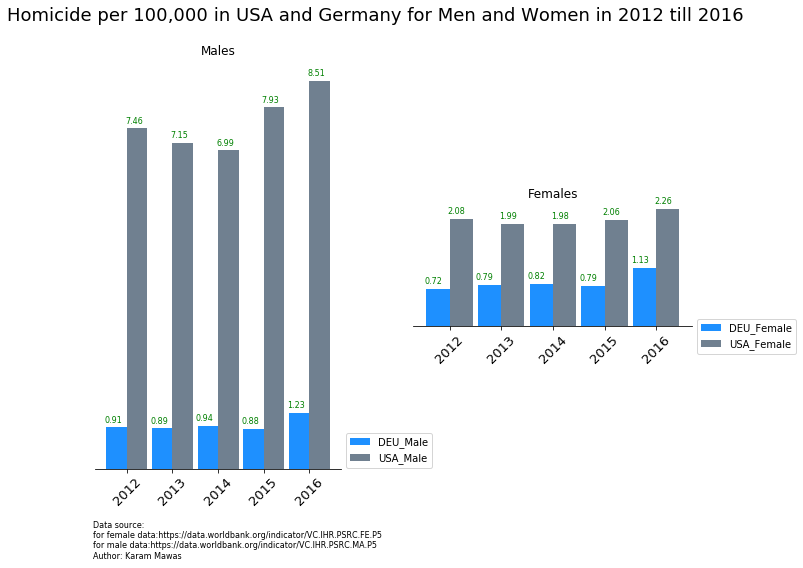

In [31]:
'''fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax2=fig.add_subplot(1,2,1)'''
fig, axes = plt.subplots(nrows=1, ncols=2);
df[['DEU_Male','USA_Male']].plot(kind='bar', width=0.9,ax=axes[0],figsize=(11, 7.5),legend=False,
                                                    title='Males', color=['dodgerblue', 'slategray'], fontsize=13);
df[['DEU_Female','USA_Female']].plot(kind='bar', width=0.9,ax=axes[1],figsize=(11, 7.5),legend=False,
                                                   title='Females',color=['dodgerblue', 'slategray'], fontsize=13);

fig.suptitle("Homicide per 100,000 in USA and Germany for Men and Women in 2012 till 2016",
    fontsize=18);

for ax in axes:
    ax.set_aspect('equal')
    patches, labels = ax.get_legend_handles_labels()
    ax.legend(patches, labels, loc='best',bbox_to_anchor=(1, 0.1))
    ax.set_alpha(0.8)

    #set the axis ticks
    ax.set_xticks(np.arange(0,5));
    ax.set_xticklabels(df.index, rotation=45);
    ax.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()-.04, i.get_height()+0.1, \
                str(round((i.get_height()), 2)), fontsize=8, color='green',
                    rotation=0)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
#axes[0].set_xlabel("Male",fontsize=12);
#axes[1].set_xlabel("Female",fontsize=12);
plt.text(-6.9,-4.5,"Data source:"
         "\nfor female data:https://data.worldbank.org/indicator/VC.IHR.PSRC.FE.P5" 
         '\nfor male data:https://data.worldbank.org/indicator/VC.IHR.PSRC.MA.P5 '
       "\nAuthor: Karam Mawas"    
       , fontsize=8);    
plt.savefig("Homicide_in_USA_and_Germany_2012-2016.png", bbox_inches="tight") 